### Classification models

Classification is a form of machine learning model in which you train a model to predict which
category an item belongs to.

Binary classification is a machine learning approach which aims to predict the probability of data labels.

One of the simplest model is the *logistic regression*.

#### Classification pipeline

In [27]:
import pandas as pd

In [28]:
PATH = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv'
diabetes = pd.read_csv(PATH)
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [29]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

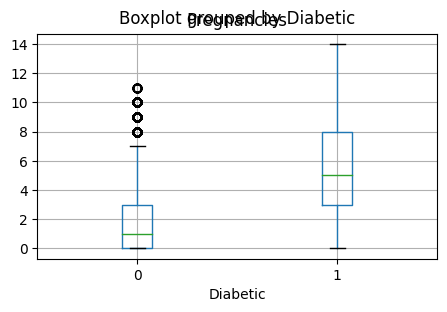

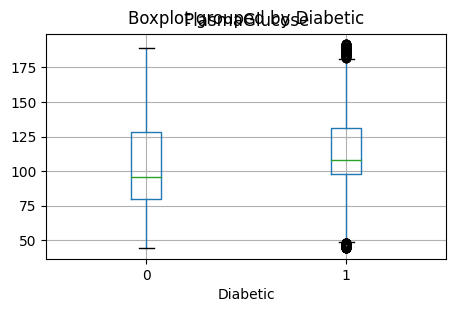

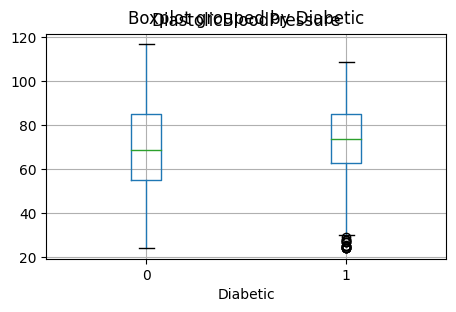

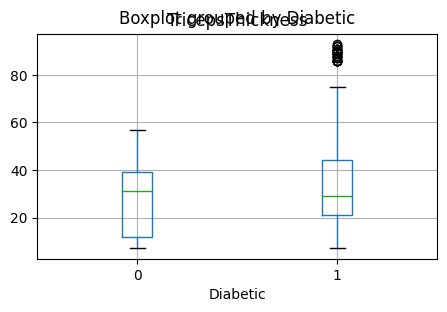

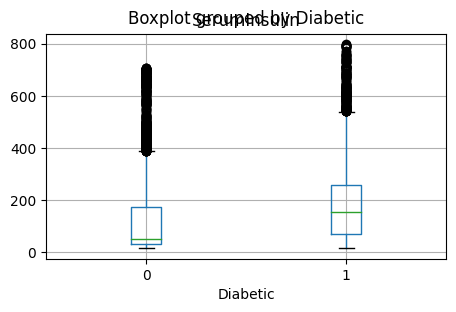

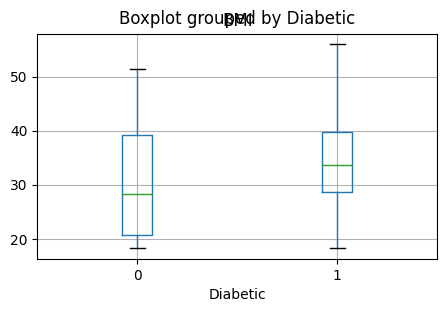

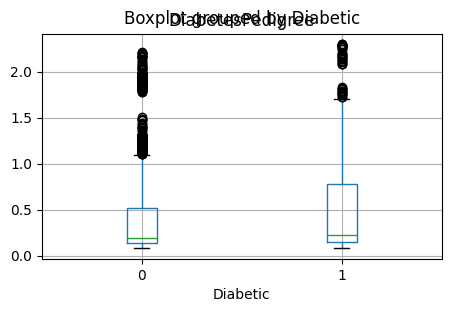

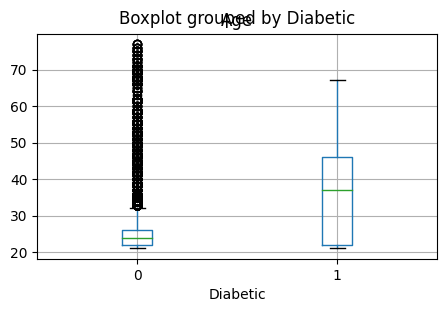

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(5,3))
    plt.title(col)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


In [32]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

In [33]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7893333333333333


In [34]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

# precision: tra quelli predetti, quanti sono corretti?TP/TP+FP
# recall: tra quelli actual, quanti ne ho indovinati? TP/TP+FN

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



In [35]:
from sklearn.metrics import confusion_matrix

# TN -> FP -> FN -> TP
confusion_matrix(y_test, predictions)

array([[2638,  348],
       [ 600,  914]], dtype=int64)

In [36]:
y_scores = model.predict_proba(X_test)

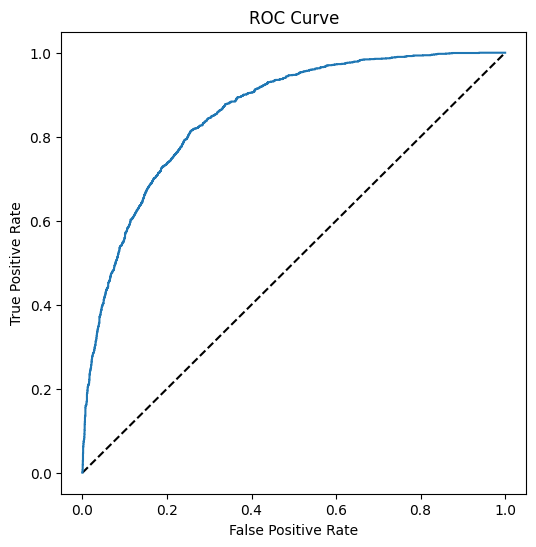

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])

#### Classification Scikit-Learn Pipeline

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202444963329531


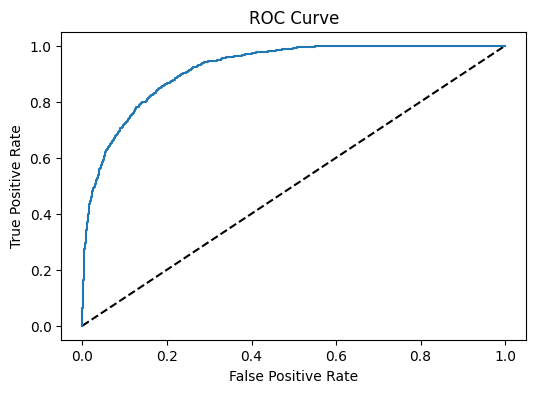

In [40]:
from sklearn.metrics import precision_score, recall_score

# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 4))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Confusion Matrix:
 [[2854  132]
 [ 174 1340]] 

Accuracy: 0.932
Overall Precision: 0.9103260869565217
Overall Recall: 0.8850726552179656

AUC: 0.9820530817084748


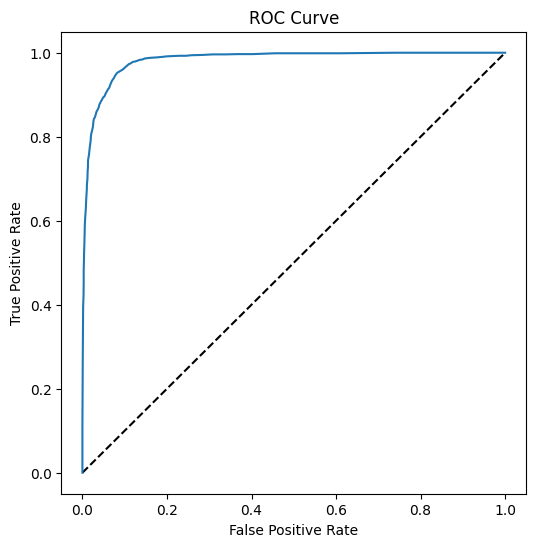

In [41]:
# Let's try different algorithms.
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))

predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [42]:
# Pred new data.
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
pred = model.predict(X_new)

#### Multiclass classification

This case occurs when the label isn't binary anymore. It can be thought of as a combination of multiple binary classification, like the following approaches:
- _One vs Rest_: if there are K different labels, K different classifier will be trained.
- _One vs One_: the classifier deals with couple of labels.


In both approaches, the overall model must take into account all of these predictions to determine which single category the item belongs to.

In [43]:
import numpy as np

In [44]:
PATH = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv'
penguins = pd.read_csv(PATH)

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
58,36.5,16.6,181.0,2850.0,0
45,39.6,18.8,190.0,4600.0,0
278,51.3,19.2,193.0,3650.0,2
23,38.2,18.1,185.0,3950.0,0
53,42.0,19.5,200.0,4050.0,0
259,53.4,15.8,219.0,5500.0,1
7,39.2,19.6,195.0,4675.0,0
152,46.1,13.2,211.0,4500.0,1
217,49.8,16.8,230.0,5700.0,1
94,36.2,17.3,187.0,3300.0,0


In [45]:
penguins.shape

(344, 5)

In [46]:
penguins.isna().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [47]:
penguins[penguins.isnull().any(axis = 1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [48]:
penguins = penguins.dropna(axis = 0)

In [49]:
penguins.isna().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

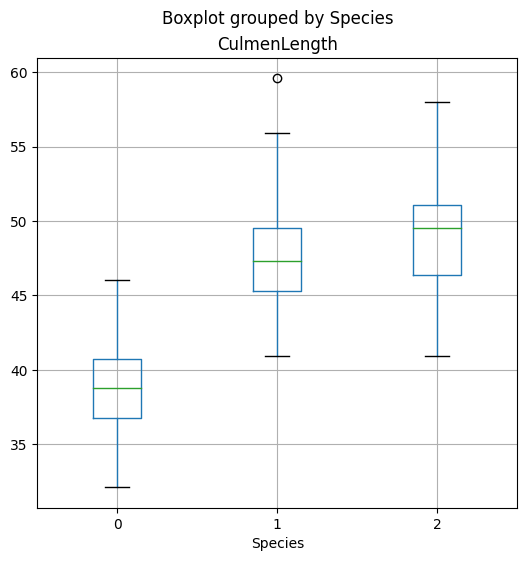

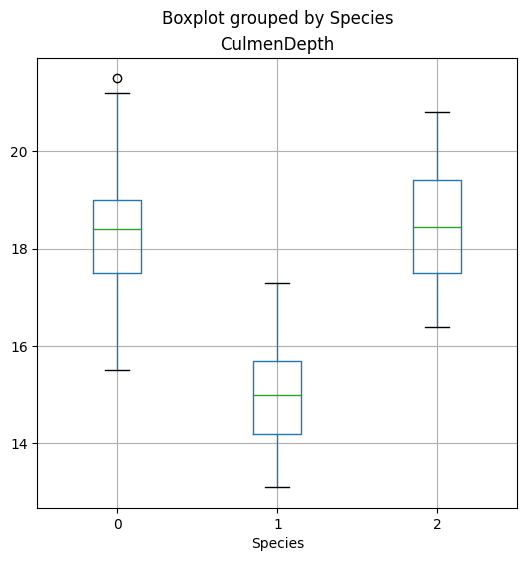

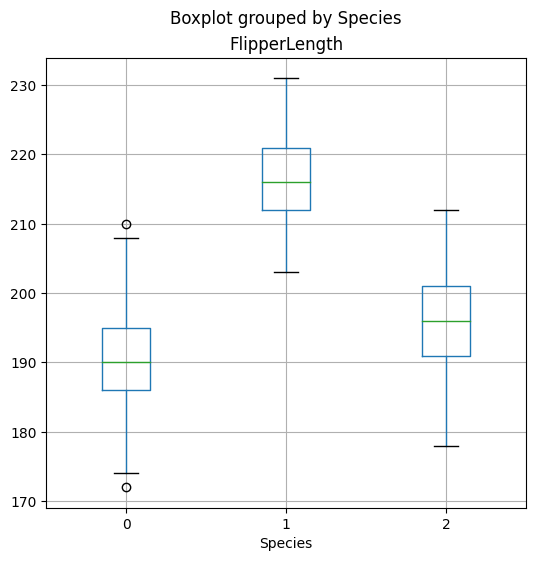

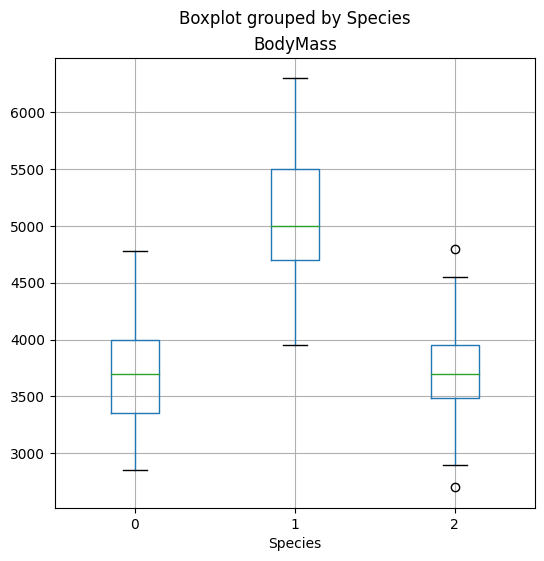

In [50]:
from matplotlib import pyplot as plt
%matplotlib inline

penguin_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = 'Species'
for col in penguin_features:
    penguins.boxplot(column=col, by=penguin_label, figsize=(6,6))
    plt.title(col)
plt.show();

In [51]:
from sklearn.model_selection import train_test_split

X, y = penguins.drop(['Species'], axis = 1), penguins['Species']

# Stratify preserve the same labels' distribution in the training and validation.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify  =y)

In [52]:
from sklearn.linear_model import LogisticRegression

reg = 0.1
multi_model = LogisticRegression(C = 1/reg, solver = 'lbfgs', multi_class = 'auto', max_iter = 10000).fit(X_train, y_train)

In [53]:
pred = multi_model.predict(X_val)

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



In [55]:
multi_model.predict_proba(np.array(X_val.values[0]).reshape(1, -1))

C:\Users\ravazzil\Anaconda3\envs\AzureML\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[9.99996662e-01, 3.33231928e-06, 5.27795151e-09]])

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_val, pred))
print("Overall Precision:",precision_score(y_val, pred, average='macro'))
print("Overall Recall:",recall_score(y_val, pred, average='macro'))

Overall Accuracy: 0.970873786407767
Overall Precision: 0.9688405797101449
Overall Recall: 0.9608465608465608


In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, pred)

array([[44,  0,  1],
       [ 0, 37,  0],
       [ 2,  0, 19]], dtype=int64)

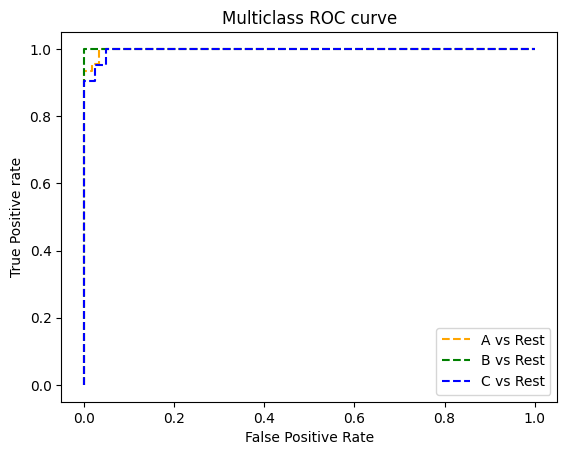

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
penguin_prob = multi_model.predict_proba(X_val)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
penguin_classes = ['A', 'B', 'C']
for i in range(len(penguin_classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val, penguin_prob[:,i], pos_label=i)

# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguin_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguin_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguin_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [60]:
auc = roc_auc_score(y_val, penguin_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9981999902100828


#### Multi-class Classification Scikit-Learn Pipeline

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(X_train, y_train)
print (multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


In [62]:
# Get predictions from test data
penguin_predictions = multi_model.predict(X_val)
penguin_prob = multi_model.predict_proba(X_val)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_val, penguin_predictions))
print("Overall Precision:",precision_score(y_val, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_val, penguin_predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_val,penguin_prob, multi_class='ovr'))

# Confusion matrix
print(classification_report(y_val, penguin_predictions))

Overall Accuracy: 0.9805825242718447
Overall Precision: 0.9767195767195768
Overall Recall: 0.9767195767195768
Average AUC: 0.9990361381446328
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       1.00      1.00      1.00        37
           2       0.95      0.95      0.95        21

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103



### Wine Classification

Steps:
- Import data
- Exploration: numerical vs. categorical values, missing values, univariate distribution with boxplots, describe data, bivariate distribution with target.
- Preprcessing: scaling, encoding, outlier detection.
- Feature eng.
- Train/Test split
- Model selection
- Hyperparameter tuning

#### Import data

In [72]:
PATH = 'https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv'

df = pd.read_csv(PATH)
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [73]:
df.shape

(178, 14)

#### Exploration

In [74]:
df.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

In [75]:
df.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [76]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

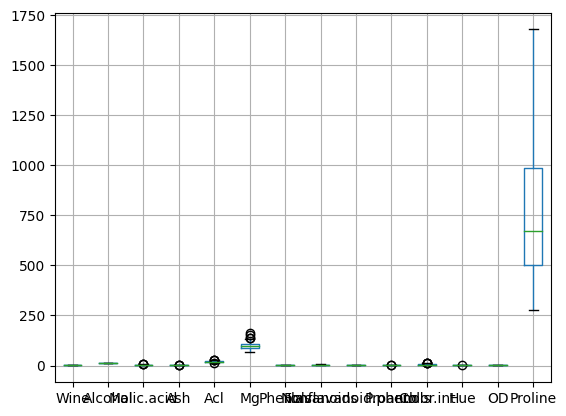

In [110]:
#-- Analisi univariata.

# 'Proline', 'Mg' assumono valori mediamente più grandi delle altre.
# df.drop(['Proline', 'Mg'], axis = 1).boxplot()
df.boxplot()

In [85]:
df.columns[1:]

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

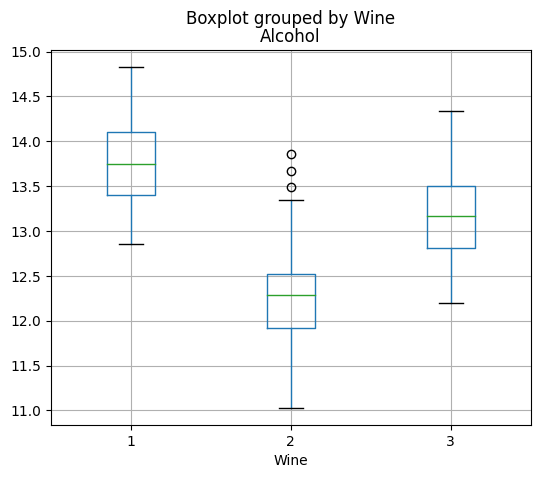

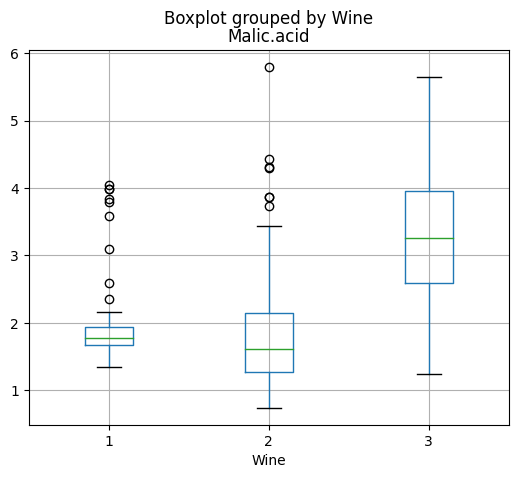

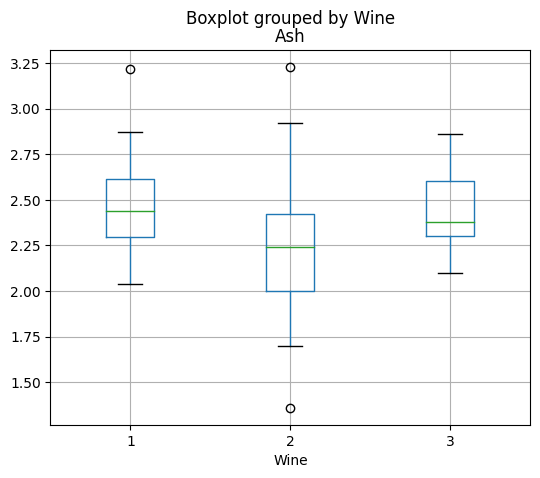

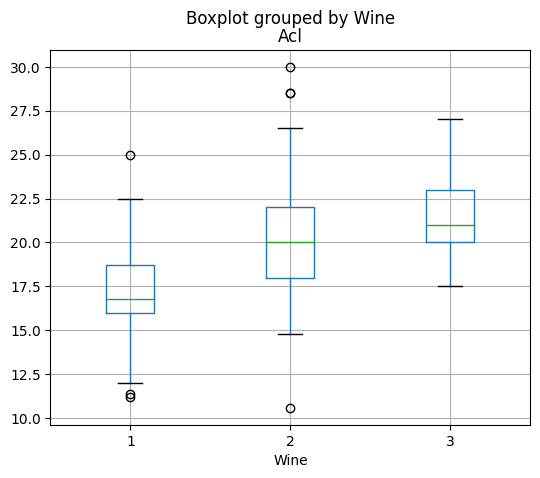

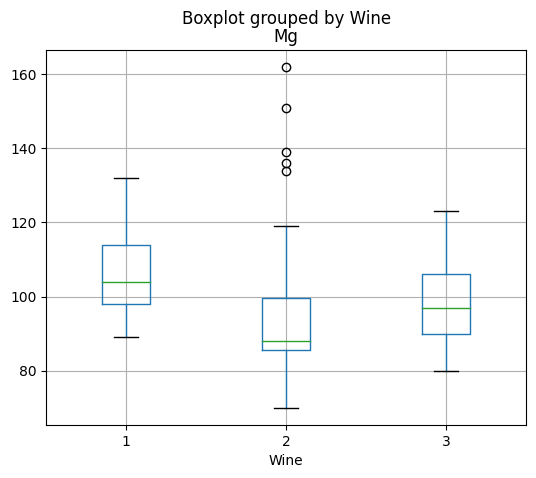

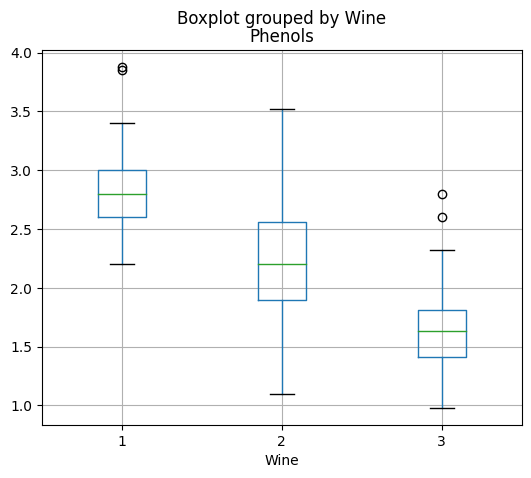

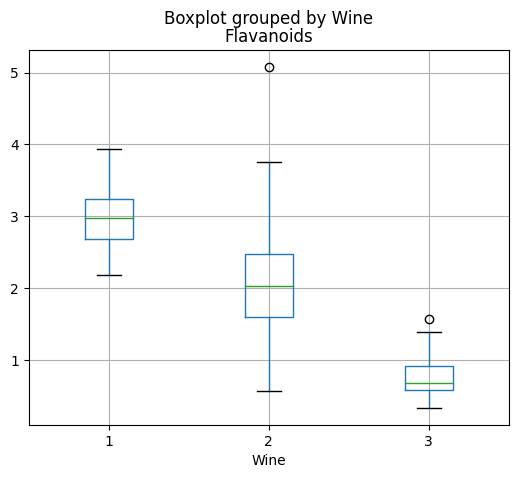

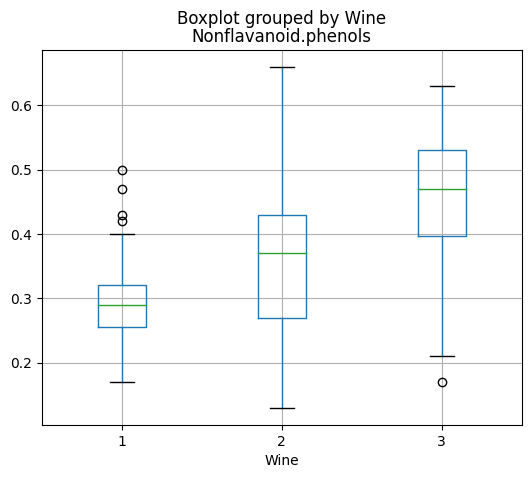

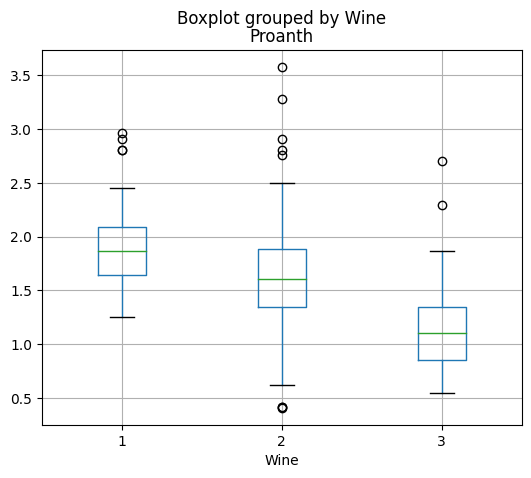

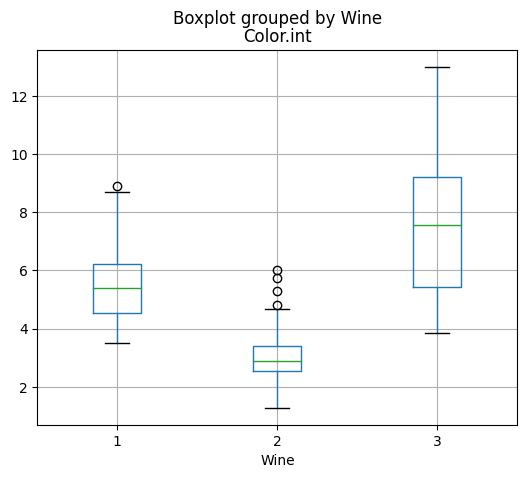

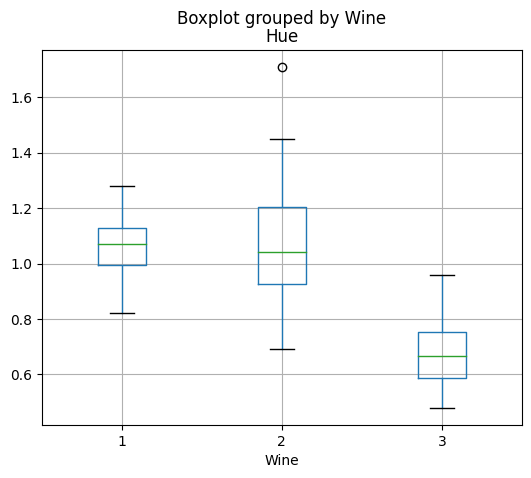

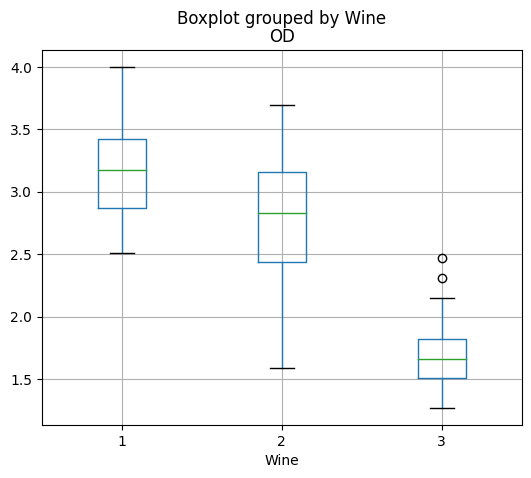

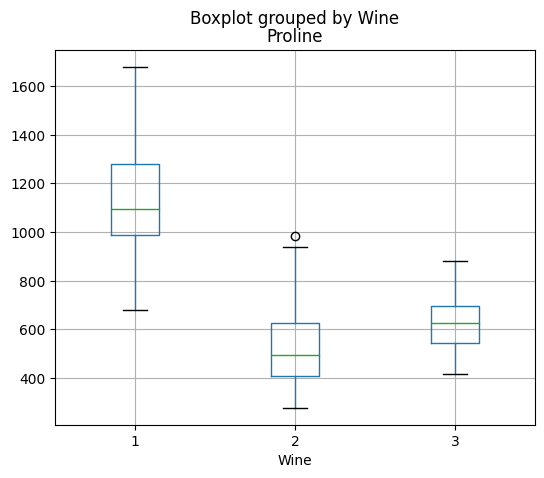

In [90]:
#-- Analisi multivariata.

for col in df.columns[1:]:
    df.boxplot(column=col, by='Wine', figsize=(6,5))
    plt.title(col)
plt.show();

In [119]:
from sklearn.model_selection import train_test_split

X, y = df.drop(['Wine'], axis = 1), df['Wine']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 4122022, stratify = y)

In [156]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
appo = scaler.fit_transform(list(X_train['Proline']))

ValueError: Expected 2D array, got 1D array instead:
array=[ 342.  720. 1280. 1510.  420.  750. 1285.  345.  985.  990.  740. 1285.
 1095.  428.  590. 1270. 1060. 1515.  718.  835. 1260.  710.  830.  695.
  680. 1285.  465.  770.  425.  562.  392.  520.  620.  600.  550. 1020.
  550.  470.  580.  290.  365.  630.  607. 1265.  675.  650.  434.  438.
  580.  985.  970.  560.  495.  372.  407.  463.  680.  845. 1195.  380.
  410.  625.  428.  510.  920.  795.  480. 1065. 1320. 1375.  915. 1045.
  750.  278. 1035.  415.  625. 1035.  725.  640.  352.  406. 1065.  564.
 1080.  750. 1035. 1290.  450.  760.  502.  472.  678.  355. 1050.  675.
 1190.  312. 1015.  570.  870.  855. 1295.  625.  840.  520.  515.  500.
 1105.  450. 1185. 1310.  630.  672. 1095.  466.  520.  315.  695.  530.
 1680.  845.  325. 1450.  660.  415.  480.  937.  500. 1060.  560.  495.
  515.  660.  625.  480.  885.  630.  510.  600.  378.  735.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X_train['Proline'].values

#### Model selection

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(X_val)

print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           2       0.87      0.93      0.90        14
           3       1.00      0.90      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



C:\Users\ravazzil\Anaconda3\envs\AzureML\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [108]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model = SVC()
model.fit(X_train, y_train)

pred = model.predict(X_val)

print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        12
           2       0.69      0.64      0.67        14
           3       0.45      0.50      0.48        10

    accuracy                           0.67        36
   macro avg       0.66      0.66      0.66        36
weighted avg       0.67      0.67      0.67        36



In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

model = KNeighborsClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_val)

print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           1       0.73      0.92      0.81        12
           2       0.73      0.57      0.64        14
           3       0.40      0.40      0.40        10

    accuracy                           0.64        36
   macro avg       0.62      0.63      0.62        36
weighted avg       0.64      0.64      0.63        36

